In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#데이터 시각화 패키지
import seaborn as sns

#train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

#sklearn.neighbors의 KNN:KneifhborsRegressor
from sklearn.neighbors import KNeighborsRegressor

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

matplotlib.rc('font',family = 'NanumGothicCoding')

In [4]:
df_raw = pd.read_csv("./data/체질검사.csv", encoding = '949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)
df_raw_x.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))


train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [7]:
knn_uncustomized = KNeighborsRegressor()
knn_uncustomized.fit(df_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Score on trainning set : 0.740
Score on test set : 0.539


In [8]:
knn_uncustomized

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [9]:
train_score = [];test_score=[]
para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsRegressor(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
#저장
df_score_knn = pd.DataFrame()
df_score_knn['Neighbors'] = para_n_neighbors
df_score_knn['TrainScore'] = train_score
df_score_knn['TestScore'] = test_score

In [10]:
df_score_knn.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,0.260
1,2,0.841,0.416
2,3,0.793,0.468
3,4,0.755,0.512
4,5,0.740,0.539
5,6,0.720,0.515
6,7,0.700,0.499
7,8,0.687,0.516
8,9,0.664,0.518
9,10,0.646,0.524


> neighbors 5가 적절

In [20]:
train_score = [];test_score=[]
para_n_neighbors = [i for i in range(1, 11)] * 2
para_weights = (['uniform']*10) + (['distance']*10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsRegressor(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
#저장
df_score_weight = pd.DataFrame()
df_score_weight['Neighbors'] = para_n_neighbors
df_score_weight['Weights'] = para_weights
df_score_weight['TrainScore'] = train_score
df_score_weight['TestScore'] = test_score

In [23]:
df_score_weight.head()

,Neighbors,Weights,TrainScore,TestScore
0,1,uniform,1.000000,0.260301
1,2,uniform,0.840753,0.415927
2,3,uniform,0.792742,0.467537
3,4,uniform,0.754752,0.511723
4,5,uniform,0.740025,0.538785


In [29]:
df_score_weight_pivot = df_score_weight.pivot(index = 'Neighbors', columns = 'Weights', values = ['TrainScore', 'TestScore'])
df_score_weight_pivot.round(3).head()

TrainScore         TestScore        
Weights     distance uniform  distance uniform
Neighbors                                     
1                1.0   1.000     0.260   0.260
2                1.0   0.841     0.432   0.416
3                1.0   0.793     0.487   0.468
4                1.0   0.755     0.527   0.512
5                1.0   0.740     0.550   0.539

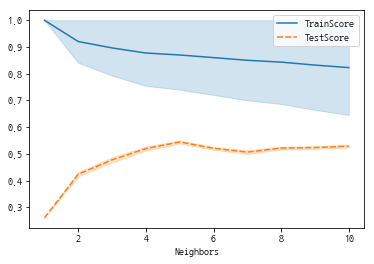

In [24]:
sns.lineplot(data = df_score_weight_pivot)

In [39]:
train_score = [];test_score=[]
para_n_neighbors = [i for i in range(1, 11)] * 3
para_metric = ['minkowski']*10 + ['euclidean']*10 + ['manhattan'] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsRegressor(n_neighbors = v_n_neighbors, metric = v_metric)
    
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
#저장
df_score_metric = pd.DataFrame()
df_score_metric['Neighbors'] = para_n_neighbors
df_score_metric['Metric'] = para_metric
df_score_metric['TrainScore'] = train_score
df_score_metric['TestScore'] = test_score

In [40]:
df_score_metric.round(3)

,Neighbors,Metric,TrainScore,TestScore
0,1,minkowski,1.000,0.260
1,2,minkowski,0.841,0.416
2,3,minkowski,0.793,0.468
3,4,minkowski,0.755,0.512
4,5,minkowski,0.740,0.539
5,6,minkowski,0.720,0.515
6,7,minkowski,0.700,0.499
7,8,minkowski,0.687,0.516
8,9,minkowski,0.664,0.518
9,10,minkowski,0.646,0.524


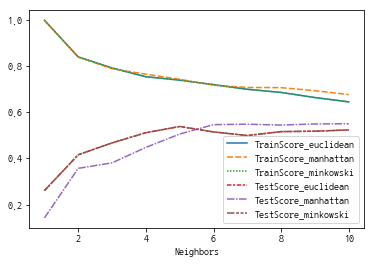

In [42]:
df_score_metric_pivot = df_score_metric.pivot(index = 'Neighbors', columns = 'Metric', values = ['TrainScore', 'TestScore'])
level0 = df_score_metric_pivot.columns.get_level_values(0)
level1 = df_score_metric_pivot.columns.get_level_values(1)
df_score_metric_pivot.columns = level0 + '_' + level1
sns.lineplot(data = df_score_metric_pivot)

# 시계열 분석